# Моделирование Теоремы Гливенко-Контелли

Мы смоделируем не саму теорему Гливенко-Контелли, а более слабое утверждение:
$$
\sup\limits_{x} |F(x)-\overline{F_n}(x)| \xrightarrow{P} 0 \Longleftrightarrow P(\sup\limits_{x} |F(x)-\overline{F_n}(x)| \geq \varepsilon) \longrightarrow 0, \text{ при } n \to \infty
$$
Используем распределение Парето для моделирования этого утверждения. Напомним, что функция распределения Парето выглядит следующим образом:
$$
F(x) = \begin{cases}
1 - \frac{1}{x^\alpha}, & x \geq 1 \cr
0, & x < 1
\end{cases}
$$
Это то самое распределение, которое гласит, что 20% людей владеют 80% богатства. Запишем также его плотность:
$$
p(x) = \begin{cases}
 \frac{\alpha}{x^{\alpha+1}}, & x \geq 1 \cr
0, & x < 1
\end{cases}
$$

In [120]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [110]:
# Импортируем необходимые библиотки
import numpy as np
import scipy
import matplotlib.pyplot as plt

Реализуем функцию распределения Парето:

In [106]:
def Pareto_distribution_function(x, alpha):
    '''
    Функция, вычисляющая значение функции распределения Парето с параметром alpha в точке x (x >= 1)
    '''
    return 1 - 1 / (x ** alpha)

Зададим параметры моделирования:

In [126]:
alpha = 4 # Параметр распределения Парето
n = 30000 # максимальное количество элементов выборки
iterations = 100 # количество итераций для каждой выборки определенного размера (для подсчета вероятности)
epsilon = 0.01 
interval = np.linspace(1, (10**(4/alpha)), 30000) # отрезок, который охватывает значения, состовляющие вероятность 0,9999 
F = Pareto_distribution_function(interval, alpha) # Функция распределение Парето для точек из interval

Само моделирование происходит следующим образом: \
Во-первых, итерация по размеру выборки (от 1 до n). Тут все понятно: параметр ni подается в функцию scipy.stats.pareto.rvs и на выходе мы получаем ni точек сгенерированный по распределению Парето с параметром alpha. \
Второй цикл нам нужен для вычисления вероятности: мы генерируем определенное количество ($iterations$) выборок одной и той же длины. Для каждой из этих выборок считаем максимальную разницу между теоретической и эмпирической функциями распределения ($supremum$). Затем считаем количество максимальных разниц, значения которых больше $epsilon$ ($n\_true$). И далее получаем вероятность для выборки данной длины: $P(|F(x)-\overline{F_n}(x)| \geq \varepsilon) = \frac{n\_true}{iterations}$. \
В самом конце строим график для визуализации.

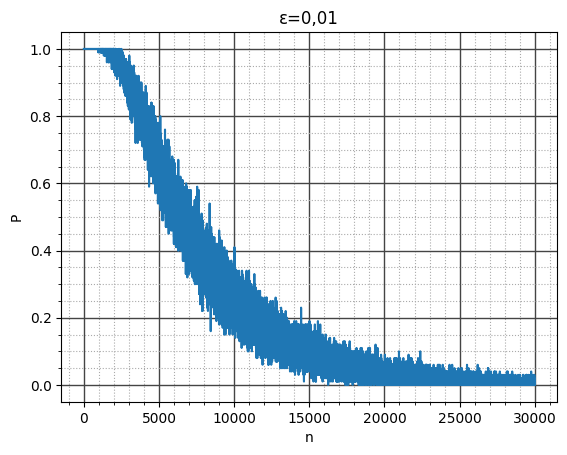

In [127]:
P = [] # Список для хранения вероятностей для выборок длины от 1 до n
for ni in range(1, n + 1):
    supremum = [] # Список для хранения максимумов отклонений генеральной и эмпирической функций распределения 
                  # для выборок определенной длины
    for mi in range(iterations):
        data = scipy.stats.pareto.rvs(alpha, size=ni)   # ni точек сгенерированный по распределению Парето
        F_n = scipy.stats.ecdf(data)                    # Эмпирическая функция распределения
        diff = np.abs(F - F_n.cdf.evaluate(interval))   # Разница между функциями распределения
        supremum.append(np.max(diff))                   
    supremum =  np.array(supremum)
    n_true = len(supremum[supremum >= epsilon])         # Количество выборок одной длины, которые >= epsilon
    P.append( n_true / iterations)
plt.plot(P)
plt.title('ε=0,01')
plt.xlabel('n')
plt.ylabel('P')
plt.minorticks_on()
plt.grid(which='major', color = '#444', linewidth = 1)
plt.grid(which='minor', color='#aaa', ls=':')
plt.show()

Видим, что вероятность действительно стремится к нулю, однако график имеет довольно большой разброс значений. Это связано с выбором $epsilon$, то есть, если это значение выбрать больше (например, $\varepsilon=0,1$), то можно получить "более приятный график", глядя на который можно с уверенностью сказать, что вероятность стремится к 0 (+можно уменьшить максимальное число элементов в выборке ($n=1000$ вместо $n=30000$)):

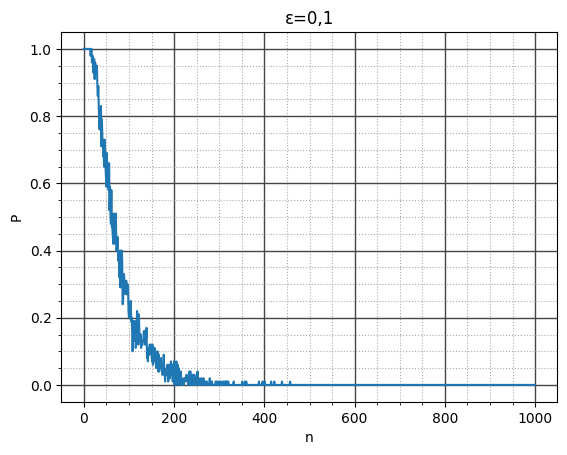

In [125]:
alpha = 4 # Параметр распределения Парето
n = 1000 # максимальное количество элементов выборки
iterations = 100 # количество итераций для каждой выборки определенного размера (для подсчета вероятности)
epsilon = 0.1 
interval = np.linspace(1, (10**(4/alpha)), 10000) # отрезок, который охватывает значения, состовляющие вероятность 0,9999 
F = Pareto_distribution_function(interval, alpha) # Функция распределение Парето для точек из interval


P = [] # Список для хранения вероятностей для выборок длины от 1 до n
for ni in range(1, n + 1):
    supremum = [] # Список для хранения максимумов отклонений генеральной и эмпирической функций распределения 
                  # для выборок определенной длины
    for mi in range(iterations):
        data = scipy.stats.pareto.rvs(alpha, size=ni)   # ni точек сгенерированный по распределению Парето
        F_n = scipy.stats.ecdf(data)                    # Эмпирическая функция распределения
        diff = np.abs(F - F_n.cdf.evaluate(interval))   # Разница между функциями распределения
        supremum.append(np.max(diff))                   
    supremum =  np.array(supremum)
    n_true = len(supremum[supremum >= epsilon])         # Количество выборок одной длины, которые >= epsilon
    P.append( n_true / iterations)
plt.plot(P)
plt.title('ε=0,1')
plt.xlabel('n')
plt.ylabel('P')
plt.minorticks_on()
plt.grid(which='major', color = '#444', linewidth = 1)
plt.grid(which='minor', color='#aaa', ls=':')
plt.show()

Другой способ сделать первый график лучше: увеличить максимальную длину выборки (взять $n=40000$, например). Однако даже для $n=30000$ подсчеты на моем ноутбуке длились больше двух часов (благо он может работать, когда я сплю). Поэтому делать очень большие выборки не позволяют ресурсы машины.